<a href="https://colab.research.google.com/github/viniciusendo/dnc_desafio_modelagem/blob/main/Desafio_Prepare_seu_dataset_para_modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de
recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
*   R (Recency): Tempo que o cliente realizou a última compra (em dias)
*   F (Frequency): Quantidade de compras realizadas pelo cliente
*   M (Monetary): Valor do ticket médio gasto pelo cliente

onde ticket médio = média do total gasto por pedido para cada cliente.


Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um
código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.



**Sobre os dados**

A tabela contém informações de compras de um e-commerce em 37 países. Contém a
identificação do cliente e os dados da compra.

| Coluna | Descrição |
| --- | --- |
| CustomerID | Código de identificação do cliente |
| Description | Descrição do produto |
| InvoiceNo | Código da fatura |
| StockCode | Código de estoque do produto |
| Quantity | Quantidade do produto |
| InvoiceDate | Data do faturamento (compra) |
| UnitPrice | Preço unitário do produto |
| Country | País da compra |

# **Configurações**

## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.6,
    rc={
        'figure.figsize': (12,8)
    }
)

## Criação do dataframe

In [ ]:
df = pd.read_csv("data.csv", encoding = 'unicode_escape')

# **EDA**

In [ ]:
# Visualização do dataset
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Visualização geral dos dados
df[["Quantity","UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Verificando a distribuição dos dados numéricos, observa-se que existem valores negativos que estão impactando nos demais valores. Isso será corrigido posteriormente, e será feito um novo describe para compararção.

In [ ]:
# Verificação de dados nulos
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Observa-se a existência de dados nulos nas colunas "Description" e "CustomerID". Para a resolução deste case em específico, vamos optar por remover as linhas com dados faltantes conforme indicado as intruções.

In [ ]:
# Remoção das linhas com dados nulos
df.dropna(subset=["CustomerID"], inplace=True)
df.isna().sum().any()

False

In [ ]:
# Verificação de linhas duplicadas
df.duplicated().sum()

5225

Observa-se a existência de linhas duplicadas. Para a resolução deste case em específico, vamos optar por remover as linhas duplicadas (mantendo as primeiras linhas) conforme indicado nas instruções.

In [ ]:
# Remoção das linhas duplicadas
df.drop_duplicates(inplace=True)
df.duplicated().sum().any()

False

In [ ]:
# Verificação de valores negativos
df = df.query("Quantity > 0 & UnitPrice > 0")
print("Quantity min:", df.Quantity.min())
print("UnitPrice min:", df.UnitPrice.min())

Quantity min: 1
UnitPrice min: 0.001


Aplicou-se um filtro para eliminar as linhas onde haviam valores negativos da quantidade ou do preço unitário do produto conforme indicado nas intruções.

In [ ]:
# Verificação dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


Verifica-se que os dados das colunas "CustomerID" e "InvoiceDate" estão no formato errado.

In [ ]:
# Correção dos tipos de dados
df["CustomerID"] = df["CustomerID"].astype(int)
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


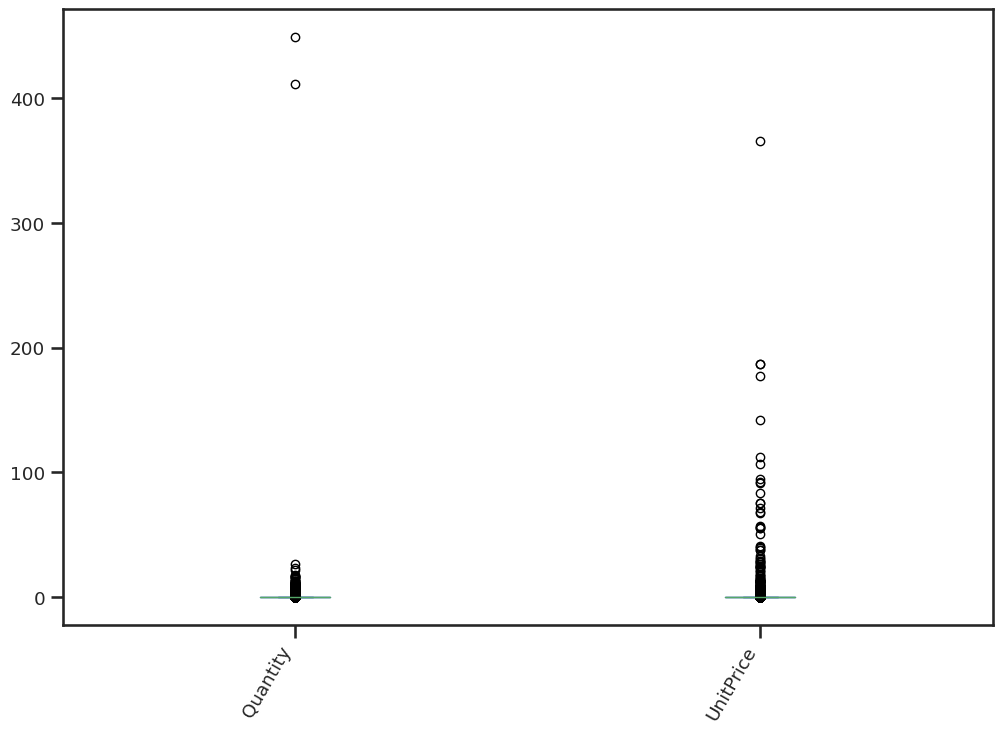

In [ ]:
# Verificação de outliers
df[["Quantity","UnitPrice"]].apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

Observamos a existência de vários outliers, de magnitude muito relevante. Para a resolução deste case em específico, vamos remover os outliers extremos em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.


In [ ]:
# Remoção dos outliers
df = df.query("Quantity < 10000 & UnitPrice < 5000")
print("Quantity max:", df.Quantity.max())
print("UnitPrice max:", df.UnitPrice.max())

Quantity max: 4800
UnitPrice max: 4161.06


In [ ]:
# Criação de coluna com valor total da compra
df['Total'] = df["Quantity"] * df["UnitPrice"]
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# Criação de variável com a data da última compra no dataset como um todo
LastDate = df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
# Visualização geral dos dados após correções
df[["Quantity","UnitPrice","Total"]].describe()

,Quantity,UnitPrice,Total
count,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,21.985370
std,43.083696,18.055047,95.899104
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,4800.000000,4161.060000,38970.000000


Após as correções, observamos mudanças consideráveis nos valores, uma vez que foram removidos valores negativos, faltantes, duplicados e tratados os outliers.

# **Gráficos**

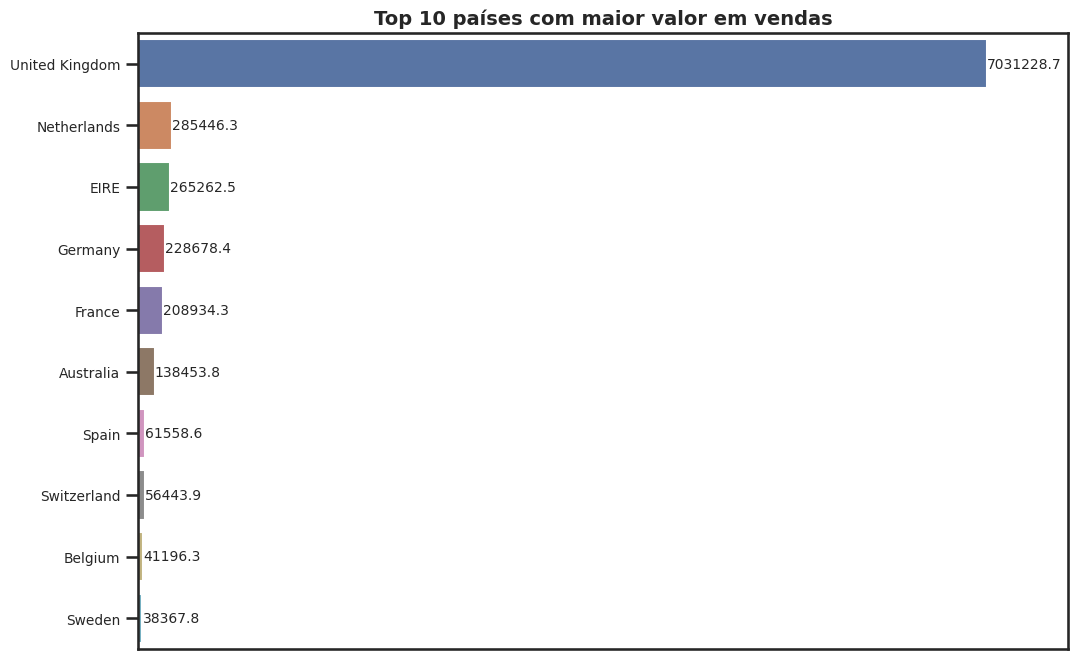

In [ ]:
# @title Top 10 países com maior valor em vendas
top10paises = df.groupby("Country")["Total"].sum().sort_values(ascending=False).reset_index().iloc[0:10]

# Plot
ax = sns.barplot(data = top10paises, x="Total", y="Country")
plt.title("Top 10 países com maior valor em vendas", fontweight='bold', fontsize=14)
plt.xlabel("")
plt.ylabel("")
ax.bar_label(ax.containers[0], size=10, fmt='{:.1f}')
ax.set_xlim(right=7700000)
plt.tick_params(labelbottom = False, bottom = False)
plt.show()

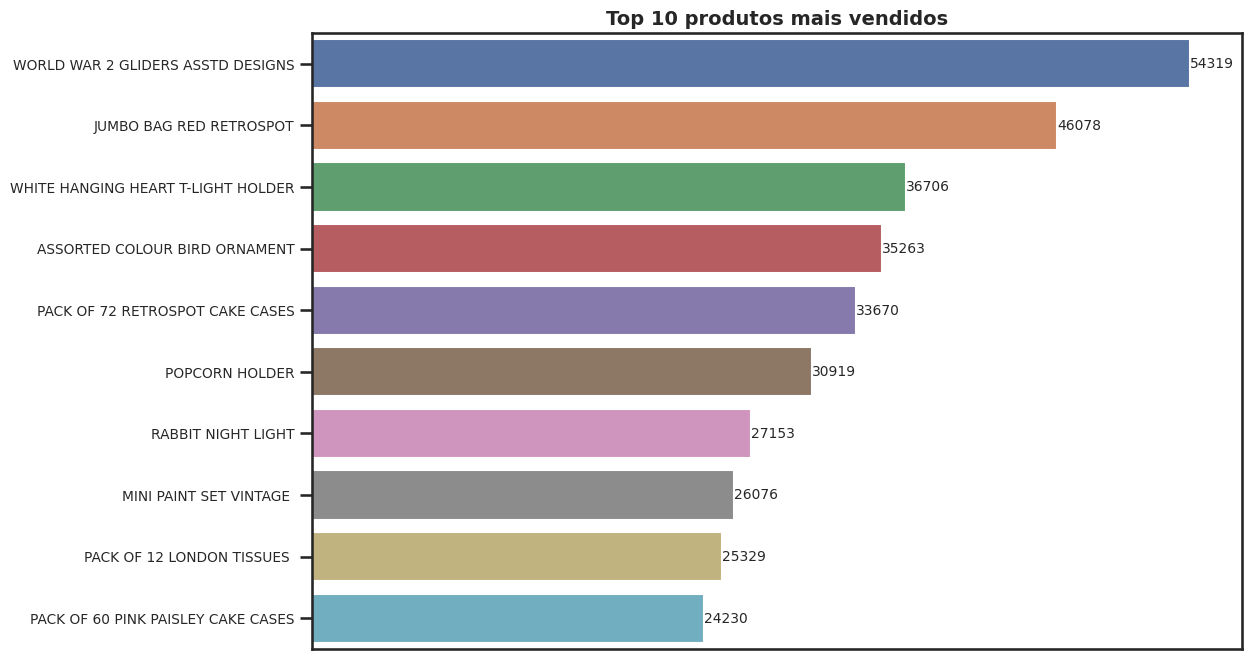

In [ ]:
# @title Top 10 produtos mais vendidos
top10produtos = df.groupby("Description")['Quantity'].sum().sort_values(ascending=False).reset_index().iloc[0:10]


# Plot
ax = sns.barplot(data = top10produtos, x="Quantity", y="Description")
plt.title("Top 10 produtos mais vendidos", fontweight='bold', fontsize=14)
plt.xlabel("")
plt.ylabel("")
ax.bar_label(ax.containers[0], size=10, fmt='{:.0f}')
ax.set_xlim(right=57500)
plt.tick_params(labelbottom = False, bottom = False)
plt.show()

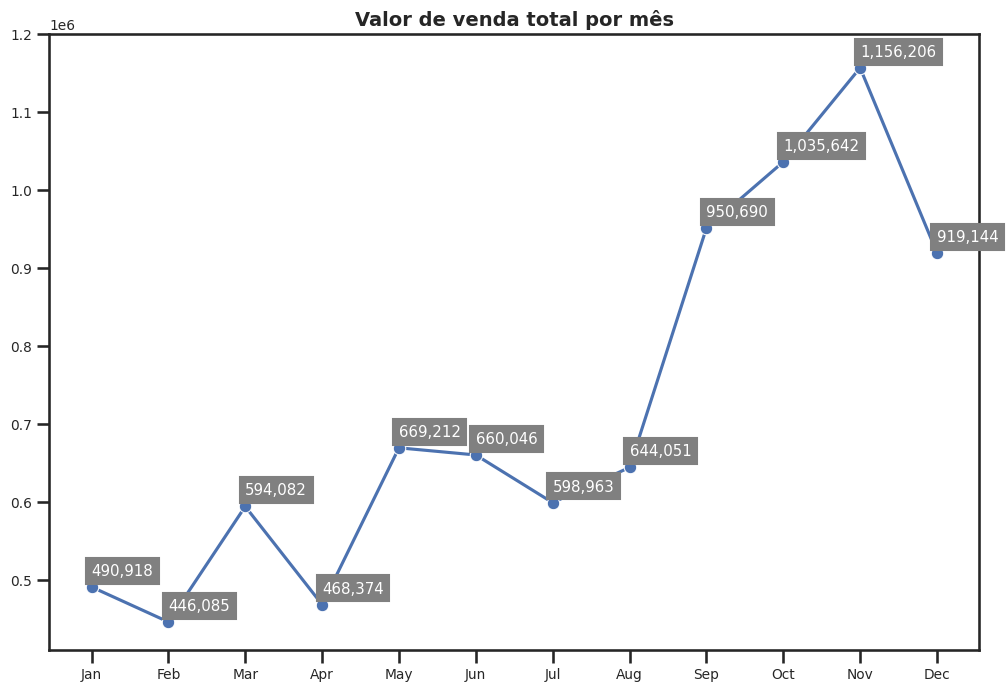

In [ ]:
# @title Valor de venda total por mês
total_mes = df.copy()
total_mes["Mes"] = df['InvoiceDate'].dt.month
total_mes["Mes_nome"] = total_mes["InvoiceDate"].dt.month_name().apply(lambda x: x[0:3])
total_mes_agg = total_mes.groupby(["Mes","Mes_nome"])["Total"].sum().reset_index()
total_mes_agg

# Plot
ax = sns.lineplot(data=total_mes_agg, x="Mes_nome", y="Total", marker='o')
plt.title("Valor de venda total por mês", fontweight='bold', fontsize=14)
plt.xlabel("")
plt.ylabel("")

for x, y in zip(total_mes_agg['Mes_nome'],total_mes_agg['Total']):
 plt.text(x = x,
 y = y+15000,
 s = '{:,.0f}'.format(y),
 color='white'
).set_backgroundcolor('grey')

ax.set_ylim(top=1200000)
plt.show()




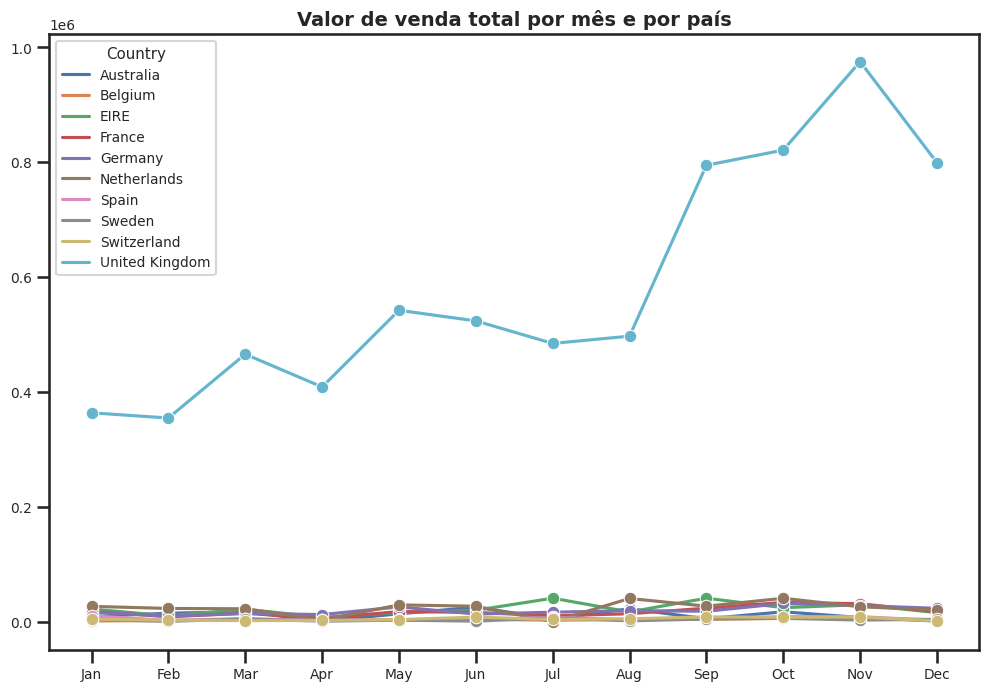

In [ ]:
# @title  Valor de venda total por mês e por país
total_mes_pais = df.copy()
total_mes_pais["Mes"] = df['InvoiceDate'].dt.month
total_mes_pais["Mes_nome"] = total_mes_pais["InvoiceDate"].dt.month_name().apply(lambda x: x[0:3])
top10pais = df.groupby("Country")["Total"].sum().sort_values(ascending=False).reset_index().iloc[0:10,0]
total_mes_pais = total_mes_pais.query("Country in @top10pais")
total_mes_pais_agg = total_mes_pais.groupby(["Mes","Mes_nome","Country"])["Total"].sum().reset_index()
total_mes_pais_agg


ax = sns.lineplot(data=total_mes_pais_agg, x="Mes_nome", y="Total", hue="Country", marker='o')
plt.title("Valor de venda total por mês e por país", fontweight='bold', fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.show()

## Considerações

*   Observa-se que o Reino Unido é o responsável pela maior parte do volume de vendas
*   Observa-se um volume de vendas consideravelmente maior no final do ano, começando a partir de Setembro.



# **RFM**

In [ ]:
# Agrupamento por ID do cliente e pedido
rfm = df.groupby(["CustomerID","InvoiceNo"]).agg(soma=('Total','sum'), ultima_compra=('InvoiceDate','max')).sort_values(by=['CustomerID'],ascending=False).reset_index()

# Agrupamento por ID do cliente
rfm = rfm.groupby("CustomerID").agg(soma=('soma','sum'),ultima_compra=("ultima_compra","max"),Frequencia=('CustomerID','count')).sort_values(by=['CustomerID'],ascending=False).reset_index()

# Adição dos indicadores de interesse
rfm['Recencia'] = (LastDate-rfm['ultima_compra']).dt.days
rfm['Ticket_Medio'] = (rfm['soma'] / rfm['Frequencia']).map('{:.2f}'.format)

# RFM finalizado
rfm.drop(columns=["soma","ultima_compra"], inplace=True)
rfm = rfm[['CustomerID',"Recencia","Frequencia",'Ticket_Medio']]
rfm['Ticket_Medio'] = rfm['Ticket_Medio'].astype(float)
display(rfm)

,CustomerID,Recencia,Frequencia,Ticket_Medio
0,18287,42,3,612.43
1,18283,3,16,127.85
2,18282,7,2,89.03
3,18281,180,1,80.82
4,18280,277,1,180.60
...,...,...,...,...
4332,12352,35,8,313.25
4333,12350,309,1,334.40
4334,12349,18,1,1757.55
4335,12348,74,4,449.31


In [ ]:
# Visualização geral dos dados
rfm[['Recencia','Frequencia','Ticket_Medio']].describe()

,Recencia,Frequencia,Ticket_Medio
count,4337.000000,4337.000000,4337.000000
mean,91.529859,4.272308,380.497955
std,99.968030,7.697064,497.433788
min,0.000000,1.000000,2.900000
25%,17.000000,1.000000,177.800000
50%,50.000000,2.000000,291.880000
75%,141.000000,5.000000,428.000000
max,373.000000,209.000000,14844.770000


Observa-se que o desvio padrão dos valores RFM é relativamente alto, indicando um conjunto de dados pouco homogêneo.

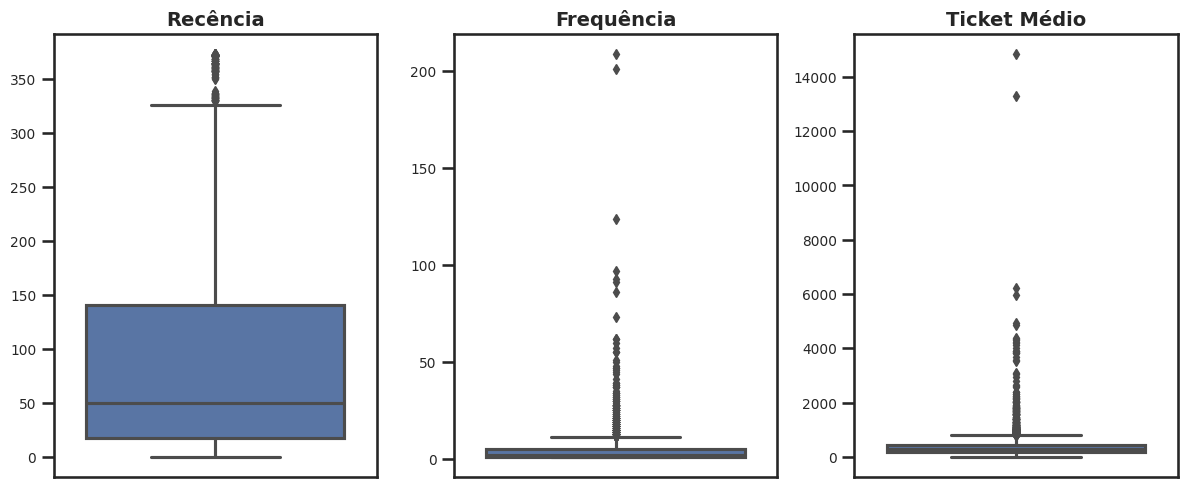

In [ ]:
# Boxplot do RFM
fig = plt.figure(figsize=(12,5))
plt.subplot(131)
sns.boxplot(rfm["Recencia"])
plt.title("Recência", fontsize=14, fontweight='bold')
plt.tick_params(labelbottom = False, bottom = False)
plt.subplot(132)
plt.title("Frequência", fontsize=14, fontweight='bold')
sns.boxplot(rfm["Frequencia"])
plt.tick_params(labelbottom = False, bottom = False)
plt.subplot(133)
plt.title("Ticket Médio", fontsize=14, fontweight='bold')
sns.boxplot(rfm["Ticket_Medio"])
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

O mesmo pode ser visto de forma mais clara no boxplot do RFM, que evidencia a dispersão dos valores e a presença de outliers.

In [ ]:
# RFM para csv
rfm.to_csv("data_rfm.csv", index=False)